In [1]:
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline


million = pd.read_csv(r'D:/School/BIG/Million1.csv', sep = ';')
#million2 = pd.read_csv(r'D:/School/BIG/Million2.csv', sep = ';', index_col = 'rank')

million.info()

print('The total memory usage is {:6.2f} MB'.format(million.memory_usage().sum()/1024**2))

In [6]:
million

,rank,URL,TLD,processtime,totalerrors,totalelements,errordensity,totalalerts,accessrank,doctype,...,Libraries - Zepto,Google Maps,Java,PHP,WebFrameworks - animate.css,WebFrameworks - Bootstrap,WebFrameworks - CodeIgniter,WebFrameworks - Laravel,WebFrameworks - Microsoft ASP.NET,WebFrameworks - ZURB Foundation
0,1,google.com,com,3.21,5,410,0.0122,4,74265,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
1,2,facebook.com,com,4.00,10,595,0.0168,12,135794,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
2,3,youtube.com,com,5.45,43,2056,0.0209,68,439632,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
3,4,twitter.com,com,2.94,37,669,0.0553,13,501528,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
4,5,microsoft.com,com,4.32,0,647,0.0000,11,2396,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,pragma-ade.com,com,2.61,8,59,0.1356,3,406549,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",...,0,0,0,0,0,0,0,0,0,0
999996,999997,qhealthzone.com,com,2.81,2,48,0.0417,2,112235,<!DOCTYPE html>,...,0,0,0,0,0,0,0,0,0,0
999997,999998,refundselection.com,com,5.11,6,176,0.0341,4,145464,<!DOCTYPE html>,...,0,0,1,0,1,1,0,0,0,0
999998,999999,shopnb574australia.com,com,2.20,3,14,0.2143,1,380551,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",...,0,0,0,1,0,0,0,0,0,0


In [2]:
#possible target variables  

# Totalerrors / totalelements = errordensity 
#access rank

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(million.isnull().sum())

rank                                 0
URL                                  0
TLD                                  0
processtime                          0
totalerrors                          0
totalelements                        0
errordensity                         0
totalalerts                          0
accessrank                           0
doctype                              0
wcagfail                             0
wcagimgfail                          0
contrast                             0
alt_area_missing                     0
alt_input_missing                    0
alt_link_missing                     0
alt_map_missing                      0
alt_missing                          0
alt_spacer_missing                   0
aria_reference_broken                0
blink                                0
button_empty                         0
heading_empty                        0
label_empty                          0
label_missing                        0
label_multiple           

No null values. nothing to impute or nulls to remove

In [13]:
print(million.dtypes)

rank                                   int64
URL                                   object
TLD                                   object
processtime                          float64
totalerrors                            int64
                                      ...   
WebFrameworks - Bootstrap              int64
WebFrameworks - CodeIgniter            int64
WebFrameworks - Laravel                int64
WebFrameworks - Microsoft ASP.NET      int64
WebFrameworks - ZURB Foundation        int64
Length: 170, dtype: object


In [14]:
g = million.columns.to_series().groupby(million.dtypes).groups
g

{dtype('int64'): Index(['rank', 'totalerrors', 'totalelements', 'totalalerts', 'accessrank',
        'wcagfail', 'wcagimgfail', 'contrast', 'alt_area_missing',
        'alt_input_missing',
        ...
        'Libraries - Zepto', 'Google Maps', 'Java', 'PHP',
        'WebFrameworks - animate.css', 'WebFrameworks - Bootstrap',
        'WebFrameworks - CodeIgniter', 'WebFrameworks - Laravel',
        'WebFrameworks - Microsoft ASP.NET', 'WebFrameworks - ZURB Foundation'],
       dtype='object', length=165),
 dtype('float64'): Index(['processtime', 'errordensity'], dtype='object'),
 dtype('O'): Index(['URL', 'TLD', 'doctype'], dtype='object')}

In [2]:
million = pd.read_csv(r'D:/School/BIG/Million1.csv', sep = ';',
                     dtype = {'processtime':'float32', 'errordensity':'float32', 'URL':'object', 'TLD':'object', 'doctype':'object',
                             'rank':'int16', 'totalerrors':'int16', 'totalelements':'int16', 'totalalerts':'int16',
                             'accessrank':'int16', 'wcagfail':'int16', 'wcagimgfail':'int16', 'contrast':'int16', 
                             'alt_area_missing':'int16', 'alt_input_missing':'int16', 'alt_link_missing':'int16', 
                             'alt_map_missing':'int16', 'alt_missing':'int16', 'alt_spacer_missing':'int16',
                             'aria_reference_broken':'int16', 'blink':'int16', 'button_empty':'int16', 'heading_empty':'int16',
                             'label_empty':'int16', 'label_missing':'int16', 'label_multiple':'int16', 'language_missing':'int16',
                             'link_empty':'int16', 'link_skip_broken':'int16', 'longdesc_invalid':'int16', 'marquee':'int16',
                             'meta_refresh':'int16', 'server_image_map':'int16', 'th_empty':'int16', 'title_invalid':'int16', 
                             'accesskey':'int16', 'alt_duplicate':'int16', 'alt_long':'int16', 'alt_redundant':'int16', 
                             'alt_suspicious':'int16', 'applet':'int16', 'audio_video':'int16', 'event_handler':'int16', 
                             'fieldset_missing':'int16', 'flash':'int16', 'h1_missing':'int16', 'heading_missing':'int16', 
                             'heading_missing':'int16', 'heading_possible':'int16', 'heading_skipped':'int16', 
                             'javascript_jumpmenu':'int16', 'label_orphaned':'int16', 'label_title':'int16', 'legend_missing':'int16', 
                             'link_document':'int16', 'link_excel':'int16', 'link_internal_broken':'int16', 'link_pdf':'int16',
                             'link_powerpoint':'int16', 'link_redundant':'int16', 'link_suspicious':'int16', 'link_word':'int16', 
                             'noscript':'int16', 'plugin':'int16', 'tabindex':'int16', 'table_caption_possible':'int16',
                             'itext_small':'int16', 'title_redundant':'int16', 'underline':'int16', 'text_justified':'int16',
                             'alt':'int16', 'alt_area':'int16', 'alt_input':'int16', 'alt_link':'int16', 'alt_map':'int16',
                             'alt_null':'int16', 'alt_spacer':'int16', 'fieldset':'int16', 'label':'int16', 'lang':'int16', 
                             'link_skip':'int16', 'link_skip_target':'int16', 'longdesc':'int16', 'totalaria':'int16', 'aria':'int16',
                             'aria_label':'int16', 'aria_search':'int16', 'aria_tabindex':'int16', 'html5_footer':'int16',
                             'html5_aside':'int16', 'html5_header':'int16', 'html5_main':'int16', 'html5_nav':'int16',
                             'html5_video_audio':'int16', 'dl':'int16', 'h1':'int16', 'h2':'int16', 'h3':'int16', 'h4':'int16', 
                             'h5':'int16', 'h6':'int16', 'iframe':'int16', 'ol':'int16', 'table_caption':'int16', 'table_data':'int16',
                             'table_layout':'int16', 'th':'int16', 'th_col':'int16', 'ul':'int16', 'Ads - AdSense':'int16',
                             'Ads - DoubleClick':'int16', 'Ads - Criteo':'int16', 'Ads - Prebid':'int16', 'Ads - AppNexus':'int16',
                             'Ads - AdRoll':'int16', 'Ads - VigLink':'int16', 'Ads - Yandex.Direct':'int16', 'ReCAPTCHA':'int16',
                             'CMS - Blogger':'int16', 'CMS - Elementor':'int16', 'CMS - 1C-Bitrix':'int16', 'CMS - Drupal':'int16',
                             'CMS - Joomla':'int16', 'CMS - Rocket':'int16', 'CMS - Squarespace':'int16', 'CMS - TYPO3 CMS':'int16',
                             'CMS - Weebly':'int16', 'CMS - Wix':'int16', 'CMS - WordPress':'int16', 'Frameworks - Angular':'int16',
                             'Frameworks - Backbone.js':'int16', 'Frameworks - Handlebars':'int16', 'Frameworks - Knockout.js':'int16',
                             'Frameworks - MooTools':'int16', 'Frameworks - Mustache':'int16', 'Frameworks - Prototype':'int16',
                             'Frameworks - React':'int16', 'Frameworks - RequireJS':'int16', 'Frameworks - TweenMax':'int16',
                             'Frameworks - Vue.js':'int16', 'Libraries - Dojo':'int16', 'Libraries - FancyBox':'int16', 
                             'Libraries - Fingerprintjs':'int16', 'Libraries - Flickity':'int16', 'Libraries - Hammer.js':'int16',
                             'Libraries - jQuery':'int16', 'Libraries - jQuery Migrate':'int16', 'Libraries - jQuery UI':'int16',
                             'Libraries - Lazy.js':'int16', 'Libraries - Lightbox':'int16', 'Libraries - Modernizr':'int16', 
                             'Libraries - Moment.js':'int16', 'Libraries - prettyPhoto':'int16', 'Libraries - script.aculo.us':'int16',
                             'Libraries - Select2':'int16', 'Libraries - Slick':'int16', 'Libraries - SoundManager':'int16', 
                             'Libraries - Underscore.js':'int16', 'Libraries - YUI':'int16', 'Libraries - Zepto':'int16',
                             'Google Maps':'int16', 'Java':'int16', 'PHP':'int16', 'WebFrameworks - animate.css':'int16', 
                             'WebFrameworks - Bootstrap':'int16', 'WebFrameworks - CodeIgniter':'int16', 
                             'WebFrameworks - Laravel':'int16', 'WebFrameworks - Microsoft ASP.NET':'int16', 
                             'WebFrameworks - ZURB Foundation':'int16'})

In [3]:
million.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 170 entries, rank to WebFrameworks - ZURB Foundation
dtypes: float32(2), int16(162), int64(3), object(3)
memory usage: 362.4+ MB


In [3]:
print('The total memory usage is {:6.2f} MB'.format(million.memory_usage().sum()/1024**2))

The total memory usage is 366.21 MB


# After meeting with stakeholder, he stated that we don't need the doctype, so no reason to one hot encode it.

In [11]:
#cat_columns = ['doctype']
#million_processed = pd.get_dummies(million, prefix_sep="__", columns=cat_columns)
#million_processed
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(million_processed.isnull().sum())
#million_processed.shape

# He also stated that error density is probably not the best target variable. He suggested that we look at Error counts or Error averages. 

In [13]:
#target = million_processed['errordensity'].squeeze()
#target.shape

In [4]:
error_count = million['totalerrors']

In [4]:
error_count

0           5
1          10
2          43
3          37
4           0
         ... 
999995      8
999996      2
999997      6
999998      3
999999    664
Name: totalerrors, Length: 1000000, dtype: int16

In [5]:
error_count.describe()

count    1000000.000000
mean          59.653607
std          141.359376
min            0.000000
25%           11.000000
50%           32.000000
75%           70.000000
max        26680.000000
Name: totalerrors, dtype: float64

In [7]:
type(error_count)

pandas.core.series.Series

In [5]:
error_count_df = pd.DataFrame(error_count, index = None)

In [7]:
error_count_df.head()

,totalerrors
0,5
1,10
2,43
3,37
4,0


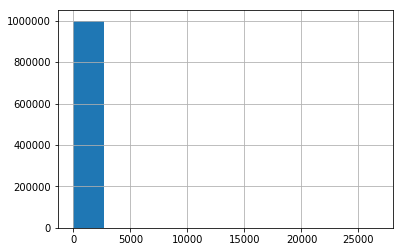

In [12]:
error_count_df['totalerrors'].hist()

In [13]:
error_count_df['cat'] = pd.cut(error_count_df['totalerrors'], bins = [-1, 50, 100, 150, 200, np.inf], labels = [1, 2, 3, 4, 5])

In [34]:
error_count_df.head()

,totalerrors,cat
0,5,1
1,10,1
2,43,1
3,37,1
4,0,1


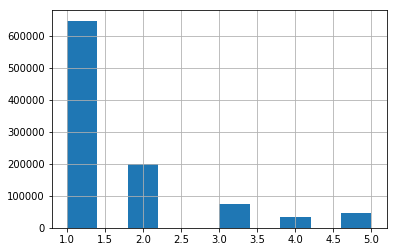

In [14]:
error_count_df['cat'].hist()

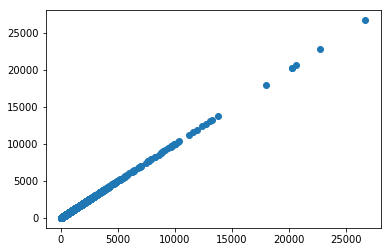

In [15]:
plt.scatter(million['totalerrors'], million['totalerrors']);

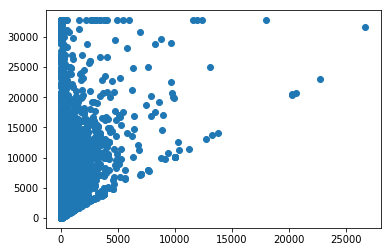

In [16]:
plt.scatter(million['totalerrors'], million['totalelements']);

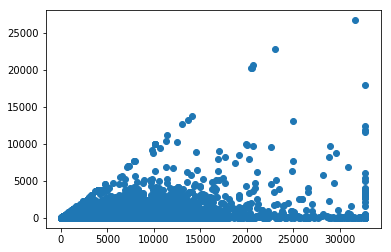

In [17]:
plt.scatter(million['totalelements'], million['totalerrors']);

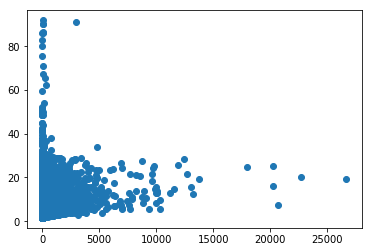

In [18]:
plt.scatter(million['totalerrors'], million['processtime']);

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


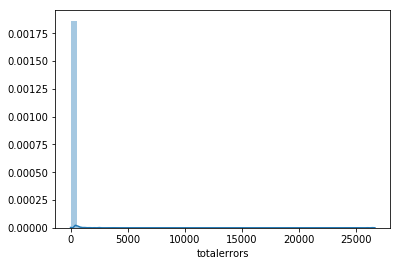

In [20]:
sns.distplot(million['totalerrors']);

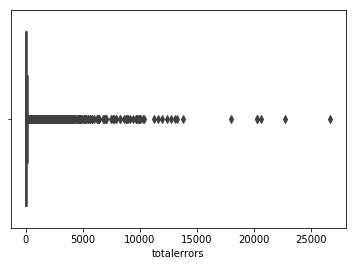

In [21]:
million['totalerrors'].value_counts()
sns.boxplot(million['totalerrors']);

In [22]:
million['totalerrors'].value_counts()

1       40659
2       34898
3       25347
0       21834
6       21766
        ...  
1877        1
1671        1
1159        1
2391        1
1646        1
Name: totalerrors, Length: 2011, dtype: int64

# explanatory features database

In [37]:
million_explanatory = million.drop(['rank', 'URL', 'TLD', 'totalerrors', 'doctype', 'errordensity'], axis = 1)

In [38]:
million_explanatory.shape

(1000000, 164)

In [39]:
million_explanatory.head()

,processtime,totalelements,totalalerts,accessrank,wcagfail,wcagimgfail,contrast,alt_area_missing,alt_input_missing,alt_link_missing,alt_map_missing,alt_missing,alt_spacer_missing,aria_reference_broken,blink,button_empty,heading_empty,label_empty,label_missing,label_multiple,language_missing,link_empty,link_skip_broken,longdesc_invalid,marquee,meta_refresh,server_image_map,th_empty,title_invalid,accesskey,alt_duplicate,alt_long,alt_redundant,alt_suspicious,applet,audio_video,event_handler,fieldset_missing,flash,h1_missing,heading_missing,heading_possible,heading_skipped,javascript_jumpmenu,label_orphaned,label_title,legend_missing,link_document,link_excel,link_internal_broken,link_pdf,link_powerpoint,link_redundant,link_suspicious,link_word,noscript,plugin,tabindex,table_caption_possible,text_small,title_redundant,underline,text_justified,alt,alt_area,alt_input,alt_link,alt_map,alt_null,alt_spacer,fieldset,label,lang,link_skip,link_skip_target,longdesc,totalaria,aria,aria_label,aria_search,aria_tabindex,html5_footer,html5_aside,html5_header,html5_main,html5_nav,html5_video_audio,dl,h1,h2,h3,h4,h5,h6,iframe,ol,table_caption,table_data,table_layout,th,th_col,th_row,ul,Ads - AdSense,Ads - DoubleClick,Ads - Criteo,Ads - Prebid,Ads - AppNexus,Ads - AdRoll,Ads - VigLink,Ads - Yandex.Direct,ReCAPTCHA,CMS - Blogger,CMS - Elementor,CMS - 1C-Bitrix,CMS - Drupal,CMS - Joomla,CMS - Rocket,CMS - Squarespace,CMS - TYPO3 CMS,CMS - Weebly,CMS - Wix,CMS - WordPress,Frameworks - Angular,Frameworks - Backbone.js,Frameworks - Handlebars,Frameworks - Knockout.js,Frameworks - MooTools,Frameworks - Mustache,Frameworks - Prototype,Frameworks - React,Frameworks - RequireJS,Frameworks - TweenMax,Frameworks - Vue.js,Libraries - Dojo,Libraries - FancyBox,Libraries - Fingerprintjs,Libraries - Flickity,Libraries - Hammer.js,Libraries - jQuery,Libraries - jQuery Migrate,Libraries - jQuery UI,Libraries - Lazy.js,Libraries - Lightbox,Libraries - Lodash,Libraries - Modernizr,Libraries - Moment.js,Libraries - prettyPhoto,Libraries - script.aculo.us,Libraries - Select2,Libraries - Slick,Libraries - SoundManager,Libraries - Underscore.js,Libraries - YUI,Libraries - Zepto,Google Maps,Java,PHP,WebFrameworks - animate.css,WebFrameworks - Bootstrap,WebFrameworks - CodeIgniter,WebFrameworks - Laravel,WebFrameworks - Microsoft ASP.NET,WebFrameworks - ZURB Foundation
0,3.21,410,4,8729,1,1,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,52,39,10,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.00,595,12,4722,1,1,7,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,4,0,0,0,0,28,14,12,0,2,1,0,0,1,0,0,0,1,3,0,0,0,0,6,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.45,2056,68,-19120,1,1,3,0,0,0,0,25,0,0,0,5,8,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,27,0,0,1,0,0,0,0,217,67,84,1,65,0,1,1,1,1,1,0,2,8,24,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.94,669,13,-22760,1,0,25,0,0,0,0,0,0,0,0,0,2,0,6,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,9,0,0,0,0,0,0,0,0,3,0,1,8,0,0,0,0,46,38,2,0,6,0,0,0,0,0,0,0,1,3,27,0,0,0,6,0,0,1,0,3,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.32,647,11,2396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,12,0,0,0,0,1,0,0,0,0,1,1,0,109,41,56,1,11,1,0,1,1,4,0,0,1,7,8,6,0,0,4,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [40]:
X = million_explanatory.iloc[:500000]
y = error_count_df.iloc[:500000, :1].squeeze()

print('The original input dataset shape is: ', million.shape)
print('The X dataset shape is: ',X.shape)
print('The y dataset shape is: ', y.shape)

The original input dataset shape is:  (1000000, 170)
The X dataset shape is:  (500000, 164)
The y dataset shape is:  (500000,)


In [41]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, random_state=0)
print('The X_train dataset shape is: ', X_train.shape)
print('The y_train dataset shape is: ', y_train.shape)
print('The X_test dataset shape is: ', X_test.shape)
print('The y_test dataset shape is: ', y_test.shape)

The X_train dataset shape is:  (350000, 164)
The y_train dataset shape is:  (350000,)
The X_test dataset shape is:  (150000, 164)
The y_test dataset shape is:  (150000,)


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score as AUC, log_loss
#from sklearn.calibration import CalibratedClassifierCV

import xgboost as xgb
import lightgbm as lgb

%matplotlib inline

In [43]:
clf = RandomForestRegressor(criterion = 'mse', n_estimators = 30, max_depth = 200, random_state = 0, n_jobs = -1, max_features = 'sqrt')
clf.fit(X_train, y_train)
#predprob_y_rf = clf.predict_proba(X_test)
pred_y_rf = clf.predict(X_test)

#print('The test accuracy is {} and logloss is{}'.format(clf.score(X_test, y_test), log_loss(y_test, pred_y_rf)))
print('The test accuracy is {}'.format(clf.score(X_test, y_test)))

The test accuracy is 0.7727383511599265


In [44]:
s = time.time()
results = []

for n in range(1,10,2):
    clf = RandomForestRegressor(criterion = 'mse', n_estimators = n, max_depth = 200, random_state = 0, n_jobs = -1,
                               max_features = 'sqrt')
    clf.fit(X_train, y_train)
    #predprob_y = clf.predict_proba(X_test)
    results.append([clf.score(X_train, y_train), clf.score(X_test, y_test)
                              #, AUC(y_test, clf.predict(X_test)) 
                             #,log_loss(y_test, predprob_y)
                             #,log_loss(y_train, clf.predict_proba(xtrain))
                            ])
    
print('Model fitted in {:.2f} seconds'.format(time.time()-s))
result = pd.DataFrame(results, index = range(1, 10, 2,), columns = ['Train accuracy', 'Test accuracy' 
                                                                   ])
result.sort_values(by = 'Test accuracy', inplace = True, ascending = False)

result

Model fitted in 18.46 seconds


,Train accuracy,Test accuracy
9,0.940365,0.700143
7,0.929662,0.689550
5,0.926623,0.674653
3,0.897208,0.655994
1,0.773569,0.278434


In [45]:
s = time.time()
results = []

for n in range(1,20,2):
    clf = RandomForestRegressor(criterion = 'mse', n_estimators = n, max_depth = 200, random_state = 0, n_jobs = -1,
                               max_features = 'sqrt')
    clf.fit(X_train, y_train)
    #predprob_y = clf.predict_proba(X_test)
    results.append([clf.score(X_train, y_train), clf.score(X_test, y_test)
                              #, AUC(y_test, clf.predict(X_test)) 
                             #,log_loss(y_test, predprob_y)
                             #,log_loss(y_train, clf.predict_proba(xtrain))
                            ])
    
print('Model fitted in {:.2f} seconds'.format(time.time()-s))
result = pd.DataFrame(results, index = range(1, 20, 2), columns = ['Train accuracy', 'Test accuracy' 
                                                                   ])
result.sort_values(by = 'Test accuracy', inplace = True, ascending = False)

result

Model fitted in 59.34 seconds


,Train accuracy,Test accuracy
19,0.962146,0.765417
17,0.960080,0.761467
15,0.954814,0.752848
13,0.950574,0.742139
11,0.944251,0.727468
9,0.940365,0.700143
7,0.929662,0.689550
5,0.926623,0.674653
3,0.897208,0.655994
1,0.773569,0.278434


In [46]:
s = time.time()
results = []

for n in range(1,40,2):
    clf = RandomForestRegressor(criterion = 'mse', n_estimators = n, max_depth = 200, random_state = 0, n_jobs = -1,
                               max_features = 'sqrt')
    clf.fit(X_train, y_train)
    #predprob_y = clf.predict_proba(X_test)
    results.append([clf.score(X_train, y_train), clf.score(X_test, y_test)
                              #, AUC(y_test, clf.predict(X_test)) 
                             #,log_loss(y_test, predprob_y)
                             #,log_loss(y_train, clf.predict_proba(xtrain))
                            ])
    
print('Model fitted in {:.2f} seconds'.format(time.time()-s))
result = pd.DataFrame(results, index = range(1, 40, 2,), columns = ['Train accuracy', 'Test accuracy' 
                                                                   ])
result.sort_values(by = 'Test accuracy', inplace = True, ascending = False)

result

Model fitted in 209.50 seconds


,Train accuracy,Test accuracy
35,0.966366,0.782710
37,0.966835,0.780779
39,0.967244,0.778950
33,0.963914,0.777596
31,0.964276,0.777019
27,0.963877,0.773582
25,0.962908,0.772835
29,0.963560,0.770052
23,0.962999,0.768675
19,0.962146,0.765417


In [70]:
s = time.time()
results = []

for n in range(1,30,5):
    for i in range(1,30,5):
        clf = RandomForestRegressor(criterion = 'mse', n_estimators = n, max_depth = i, random_state = 0, n_jobs = -1,
                                   max_features = 'sqrt')
        clf.fit(X_train, y_train)
        #predprob_y = clf.predict_proba(X_test)
        results.append([clf.score(X_train, y_train), clf.score(X_test, y_test)
                                  #, AUC(y_test, clf.predict(X_test)) 
                                 #,log_loss(y_test, predprob_y)
                                 #,log_loss(y_train, clf.predict_proba(xtrain))
                                ])

print('Model fitted in {:.2f} seconds'.format(time.time()-s))
result = pd.DataFrame(results, columns = ['Train accuracy', 'Test accuracy' 
                                                                   ])
result.sort_values(by = 'Test accuracy', inplace = True, ascending = False)

result

Model fitted in 137.36 seconds


,Train accuracy,Test accuracy
35,0.967156,0.816055
23,0.964605,0.814924
28,0.962508,0.814340
11,0.953361,0.813757
29,0.966639,0.812556
34,0.962617,0.812330
22,0.958742,0.806740
17,0.957338,0.804125
16,0.952637,0.804077
10,0.936176,0.780172


In [47]:
s = time.time()
results = []

for n in range(1,101,5):
    clf = RandomForestRegressor(criterion = 'mse', n_estimators = n, max_depth = 200, random_state = 0, n_jobs = -1,
                               max_features = 'sqrt')
    clf.fit(X_train, y_train)
    #predprob_y = clf.predict_proba(X_test)
    results.append([clf.score(X_train, y_train), clf.score(X_test, y_test)
                              #, AUC(y_test, clf.predict(X_test)) 
                             #,log_loss(y_test, predprob_y)
                             #,log_loss(y_train, clf.predict_proba(xtrain))
                            ])
    
print('Model fitted in {:.2f} seconds'.format(time.time()-s))
result = pd.DataFrame(results, index = range(1, 101, 5), columns = ['Train accuracy', 'Test accuracy' 
                                                                   ])
result.sort_values(by = 'Test accuracy', inplace = True, ascending = False)

result

Model fitted in 467.65 seconds


,Train accuracy,Test accuracy
36,0.966743,0.780289
31,0.964276,0.777019
41,0.966147,0.776445
26,0.963822,0.774133
46,0.964842,0.771988
56,0.962735,0.771133
61,0.963981,0.770343
51,0.963383,0.769574
71,0.962944,0.768462
66,0.962447,0.768268


XGBoost

In [48]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
million_explanatory.head()
#Ads-AdSense and beyond are boolean 


,processtime,totalelements,totalalerts,accessrank,wcagfail,wcagimgfail,contrast,alt_area_missing,alt_input_missing,alt_link_missing,alt_map_missing,alt_missing,alt_spacer_missing,aria_reference_broken,blink,button_empty,heading_empty,label_empty,label_missing,label_multiple,language_missing,link_empty,link_skip_broken,longdesc_invalid,marquee,meta_refresh,server_image_map,th_empty,title_invalid,accesskey,alt_duplicate,alt_long,alt_redundant,alt_suspicious,applet,audio_video,event_handler,fieldset_missing,flash,h1_missing,heading_missing,heading_possible,heading_skipped,javascript_jumpmenu,label_orphaned,label_title,legend_missing,link_document,link_excel,link_internal_broken,link_pdf,link_powerpoint,link_redundant,link_suspicious,link_word,noscript,plugin,tabindex,table_caption_possible,text_small,title_redundant,underline,text_justified,alt,alt_area,alt_input,alt_link,alt_map,alt_null,alt_spacer,fieldset,label,lang,link_skip,link_skip_target,longdesc,totalaria,aria,aria_label,aria_search,aria_tabindex,html5_footer,html5_aside,html5_header,html5_main,html5_nav,html5_video_audio,dl,h1,h2,h3,h4,h5,h6,iframe,ol,table_caption,table_data,table_layout,th,th_col,th_row,ul,Ads - AdSense,Ads - DoubleClick,Ads - Criteo,Ads - Prebid,Ads - AppNexus,Ads - AdRoll,Ads - VigLink,Ads - Yandex.Direct,ReCAPTCHA,CMS - Blogger,CMS - Elementor,CMS - 1C-Bitrix,CMS - Drupal,CMS - Joomla,CMS - Rocket,CMS - Squarespace,CMS - TYPO3 CMS,CMS - Weebly,CMS - Wix,CMS - WordPress,Frameworks - Angular,Frameworks - Backbone.js,Frameworks - Handlebars,Frameworks - Knockout.js,Frameworks - MooTools,Frameworks - Mustache,Frameworks - Prototype,Frameworks - React,Frameworks - RequireJS,Frameworks - TweenMax,Frameworks - Vue.js,Libraries - Dojo,Libraries - FancyBox,Libraries - Fingerprintjs,Libraries - Flickity,Libraries - Hammer.js,Libraries - jQuery,Libraries - jQuery Migrate,Libraries - jQuery UI,Libraries - Lazy.js,Libraries - Lightbox,Libraries - Lodash,Libraries - Modernizr,Libraries - Moment.js,Libraries - prettyPhoto,Libraries - script.aculo.us,Libraries - Select2,Libraries - Slick,Libraries - SoundManager,Libraries - Underscore.js,Libraries - YUI,Libraries - Zepto,Google Maps,Java,PHP,WebFrameworks - animate.css,WebFrameworks - Bootstrap,WebFrameworks - CodeIgniter,WebFrameworks - Laravel,WebFrameworks - Microsoft ASP.NET,WebFrameworks - ZURB Foundation
0,3.21,410,4,8729,1,1,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,52,39,10,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.00,595,12,4722,1,1,7,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,4,0,0,0,0,28,14,12,0,2,1,0,0,1,0,0,0,1,3,0,0,0,0,6,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.45,2056,68,-19120,1,1,3,0,0,0,0,25,0,0,0,5,8,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,27,0,0,1,0,0,0,0,217,67,84,1,65,0,1,1,1,1,1,0,2,8,24,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.94,669,13,-22760,1,0,25,0,0,0,0,0,0,0,0,0,2,0,6,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,9,0,0,0,0,0,0,0,0,3,0,1,8,0,0,0,0,46,38,2,0,6,0,0,0,0,0,0,0,1,3,27,0,0,0,6,0,0,1,0,3,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.32,647,11,2396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,12,0,0,0,0,1,0,0,0,0,1,1,0,109,41,56,1,11,1,0,1,1,4,0,0,1,7,8,6,0,0,4,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [49]:
non_boolean = million_explanatory.iloc[:,:104]

In [50]:
dummy_v = pd.get_dummies(non_boolean)

In [51]:
dummy_v.head()

,processtime,totalelements,totalalerts,accessrank,wcagfail,wcagimgfail,contrast,alt_area_missing,alt_input_missing,alt_link_missing,alt_map_missing,alt_missing,alt_spacer_missing,aria_reference_broken,blink,button_empty,heading_empty,label_empty,label_missing,label_multiple,language_missing,link_empty,link_skip_broken,longdesc_invalid,marquee,meta_refresh,server_image_map,th_empty,title_invalid,accesskey,alt_duplicate,alt_long,alt_redundant,alt_suspicious,applet,audio_video,event_handler,fieldset_missing,flash,h1_missing,heading_missing,heading_possible,heading_skipped,javascript_jumpmenu,label_orphaned,label_title,legend_missing,link_document,link_excel,link_internal_broken,link_pdf,link_powerpoint,link_redundant,link_suspicious,link_word,noscript,plugin,tabindex,table_caption_possible,text_small,title_redundant,underline,text_justified,alt,alt_area,alt_input,alt_link,alt_map,alt_null,alt_spacer,fieldset,label,lang,link_skip,link_skip_target,longdesc,totalaria,aria,aria_label,aria_search,aria_tabindex,html5_footer,html5_aside,html5_header,html5_main,html5_nav,html5_video_audio,dl,h1,h2,h3,h4,h5,h6,iframe,ol,table_caption,table_data,table_layout,th,th_col,th_row,ul,Ads - AdSense
0,3.21,410,4,8729,1,1,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,52,39,10,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0
1,4.00,595,12,4722,1,1,7,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,5,0,0,4,0,0,0,0,28,14,12,0,2,1,0,0,1,0,0,0,1,3,0,0,0,0,6,0,0,0,1,0,0,0,2,0
2,5.45,2056,68,-19120,1,1,3,0,0,0,0,25,0,0,0,5,8,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,42,0,0,0,0,0,0,0,27,0,0,1,0,0,0,0,217,67,84,1,65,0,1,1,1,1,1,0,2,8,24,0,0,0,1,0,0,0,0,0,0,0,1,0
3,2.94,669,13,-22760,1,0,25,0,0,0,0,0,0,0,0,0,2,0,6,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,9,0,0,0,0,0,0,0,0,3,0,1,8,0,0,0,0,46,38,2,0,6,0,0,0,0,0,0,0,1,3,27,0,0,0,6,0,0,1,0,3,0,0,10,0
4,4.32,647,11,2396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,12,0,0,0,0,1,0,0,0,0,1,1,0,109,41,56,1,11,1,0,1,1,4,0,0,1,7,8,6,0,0,4,0,0,0,0,0,0,0,22,0


In [52]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
dummy_v_df = dummy_v.applymap(encode_units)

In [53]:
dummy_v_df.head()

,processtime,totalelements,totalalerts,accessrank,wcagfail,wcagimgfail,contrast,alt_area_missing,alt_input_missing,alt_link_missing,alt_map_missing,alt_missing,alt_spacer_missing,aria_reference_broken,blink,button_empty,heading_empty,label_empty,label_missing,label_multiple,language_missing,link_empty,link_skip_broken,longdesc_invalid,marquee,meta_refresh,server_image_map,th_empty,title_invalid,accesskey,alt_duplicate,alt_long,alt_redundant,alt_suspicious,applet,audio_video,event_handler,fieldset_missing,flash,h1_missing,heading_missing,heading_possible,heading_skipped,javascript_jumpmenu,label_orphaned,label_title,legend_missing,link_document,link_excel,link_internal_broken,link_pdf,link_powerpoint,link_redundant,link_suspicious,link_word,noscript,plugin,tabindex,table_caption_possible,text_small,title_redundant,underline,text_justified,alt,alt_area,alt_input,alt_link,alt_map,alt_null,alt_spacer,fieldset,label,lang,link_skip,link_skip_target,longdesc,totalaria,aria,aria_label,aria_search,aria_tabindex,html5_footer,html5_aside,html5_header,html5_main,html5_nav,html5_video_audio,dl,h1,h2,h3,h4,h5,h6,iframe,ol,table_caption,table_data,table_layout,th,th_col,th_row,ul,Ads - AdSense
0,1,1,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,1,1,1,0,1,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0


In [54]:
s = time.time()
fold = 1
for i in range(fold):
    params = {
        'eta': 0.02, #learning rate. Smaller learning rate, to learn a little a time. Large learning rate learns faster, but changes more.
        'max_depth': 6, #depth of the trees. Controlls overfitting. 
        'objective': 'binary:logistic', #binary
        'eval_metric': 'logloss', #in the Kaggle competition the official metric is logloss. 
        'seed': i, # controls random sampling of the data
        'silent': True #
    }
    watchlist = [(xgb.DMatrix(X_train, y_train), 'train'), (xgb.DMatrix(X_test, y_test), 'valid')] # train the data w/ many runs. This model is applied to validation data set.
        #training and validating at a long time. This is early stopping, to help the model stop once improvment has a terribly decreasing rate. 
    model = xgb.train(params, xgb.DMatrix(X_train, y_train), 400,  watchlist,  maximize=False, verbose_eval=50, early_stopping_rounds=50) 
    if i != 0:
        pred_y += model.predict(xgb.DMatrix(X_test, y_test), ntree_limit=model.best_ntree_limit) #(+= is cumsum, or append.)
    else:
        pred_y = model.predict(xgb.DMatrix(X_test, y_test), ntree_limit=model.best_ntree_limit)
pred_y /= fold # divided by

print('time used:', time.time()-s)
print('test log loss is {}\n'.format(log_loss(y_test,pred_y)))


D:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBoostError: [19:45:04] C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:101: label must be in [0,1] for logistic regression

In [51]:
million['errordensity'].dtypes

dtype('O')

In [52]:
million['errordensity'].head()

0    0.0122
1    0.0168
2    0.0209
3    0.0553
4       0.0
Name: errordensity, dtype: object